# Project: WeRateDogs Twitter Data Analysis By Chimamaka Chilaka

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
% matplotlib inline
import os 
import tweepy
import re
import json
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

#### 1. Read in the downloaded twitter csv file

In [2]:
# reading the twitter csv file into a dataframe
tweet_data = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# a preview of what the data looks like to ensure it is loaded correctly
tweet_data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Creating a folder if does not already exist
folder_name = "images"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# making the request using the url and storing in a variable
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [6]:
# open the file and write the content to response file handle we created
with open(os.path.join(folder_name,
                       url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

In [7]:
# reading the image file into a dataframe
tweet_data_image = pd.read_csv(url, sep='\t')

In [8]:
# previewing the data 
tweet_data_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

As the comments in the below cell indicates, due to some verification issues, the below cell need not be run. However, for reference purposes, the below cell is shown to enable us understand what needs to be done when there is available twitter authentication rights. 

In [ ]:
# importing packages
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
# Creating an empty list, then reading our available json txt file and 
# appending the tweet_id, retweet_count and favorite_count into the empty list
df3_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file.readlines():
        tweet_lines = json.loads(line)
        tweet_id = tweet_lines['id']
        retweet_count = tweet_lines['retweet_count']
        favorite_count = tweet_lines['favorite_count']
        
        df3_list.append({"tweet_id" : tweet_id,
                        "retweet_count" : retweet_count,
                        "favorite_count" : favorite_count})

In [10]:
# saving the list generated in the previous cell into a pandas dataframe
tweet_data3 = pd.DataFrame(df3_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
# calling the head() function to view our created dataframe
tweet_data3.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data 

### Accessing Data 1(tweet_data: Twitter archive data)

#### Visual assesment 

In [12]:
# calling the tweet_data dataframe, scrolling through the dataset to access
tweet_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programmatic Assessment

In [13]:
# calling the head() function to take a look at the 1st 5 rows
tweet_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# getting a summary of the data frame
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
# random 4 rows of the data frame
tweet_data.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
2096,670755717859713024,NaN,NaN,2015-11-29 00:06:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gin &amp; Tonic. They're having a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670755717...,9,10,Gin,None,None,None,None


In [16]:
# checks the number of columns and rows
tweet_data.shape

(2356, 17)

In [17]:
# call up the last 5 rows of the data frame
tweet_data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [18]:
# count the number of null values in each column
tweet_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Comment: Notice there are more null values in the retweeted columns. This null values will not affect our analysis as in fact, the rows with non null values will need to be dropped as retweets are not required for the analysis.

In [19]:
# confirming the count of duplicate values
tweet_data.duplicated().sum()

0

In [20]:
# performs summary statistics on the data frame, producing the 4 quartiles, mean etcetera
tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# checking the rating denominator that is not 10.
# Note that the rating formula is said to have only 10 as denominator
tweet_data.rating_denominator[tweet_data.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

There are denominators other than 10 and will be addressed later in the analysis

In [22]:
# checking out the rating numerator
# rating numerator can be greater or less than 10 based on the unique rating system
tweet_data.rating_numerator[tweet_data.rating_numerator != 10]

0       13
1       13
2       12
3       13
4       12
5       13
6       13
7       13
8       13
9       14
10      13
11      13
12      13
13      12
14      13
15      13
16      12
17      13
18      13
19      13
20      12
21      13
22      14
23      13
24      13
25      12
26      13
27      13
28      13
29      12
        ..
2317     9
2319     9
2320     7
2322     6
2323     7
2324    12
2326     2
2327     7
2328     9
2329    11
2330     6
2331     8
2333     9
2334     3
2335     1
2336    11
2338     1
2339    11
2340     8
2341     9
2342     6
2344     9
2346     8
2347     9
2349     2
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 1895, dtype: int64

In [23]:
# checking out the dog names
tweet_data['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
Bailey              7
Toby                7
an                  7
Daisy               7
Buddy               7
Stanley             6
Koda                6
Scout               6
Milo                6
Oscar               6
Rusty               6
Jack                6
Bella               6
Dave                6
Leo                 6
Jax                 6
Oakley              5
                 ... 
Jangle              1
Stormy              1
Timofy              1
Bonaparte           1
Beckham             1
Claude              1
Enchilada           1
Michelangelope      1
Murphy              1
BeBe                1
Wesley              1
Julio               1
Freddery            1
Meera               1
Deacon    

Noticed that names that starts with lower case seems not to be dog names.

In [24]:
# checcking out the names that starts with lower case usin regex
names_lower = tweet_data['name'].str.contains("^[a-z]", regex=True)
tweet_data[names_lower].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

The above names can be confirmed not to be dog names and will be addressed during the cleaning process.

In [27]:
# checking out the different dog stages
doggo = tweet_data.doggo.value_counts()
floofer = tweet_data.floofer.value_counts()
pupper = tweet_data.pupper.value_counts()
puppo = tweet_data.puppo.value_counts()

print(doggo)
print(floofer)
print(pupper)
print(puppo)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [26]:
# previewing the source column
tweet_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
# checking out the names of the columns in the data frame
tweet_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Accessing Data 2 (twitter image data)

#### Visual assessment

In [29]:
# visually assessing the 2nd data frame
tweet_data_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programatic assessment

In [30]:
# calls the 1st 5 rows of the data frame
tweet_data_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
# calls the last five rows of the data frame
tweet_data_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [32]:
# Getting the summary of the data
tweet_data_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# getting the number of columns and rows
tweet_data_image.shape

(2075, 12)

In [34]:
# checking the value count and proportions of p1_dog(picture 1)
tweet_data_image.p1_dog.value_counts(normalize=True)

True     0.738313
False    0.261687
Name: p1_dog, dtype: float64

In [35]:
# checking the unique values in the p1 column
tweet_data_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [36]:
# checking out the columns of the data
tweet_data_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Accessing Data 3 (tweet_data3)

#### Visual Assessment

In [37]:
# Visually assessing the data
tweet_data3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [38]:
# getting a concise summary of the columns
tweet_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [39]:
# checking columns with null values
tweet_data3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [40]:
# getting the summary statistics of the data
tweet_data3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [41]:
# getting the number of columns and rows 
tweet_data3.shape

(2354, 3)

In [42]:
# random rows of the data
tweet_data3.sample(5)

,tweet_id,retweet_count,favorite_count
1828,676219687039057920,31989,67100
1220,714258258790387713,808,3281
672,789628658055020548,2080,8448
387,826598365270007810,2709,11117
627,794926597468000259,2697,11492


In [43]:
# getting the column names
tweet_data3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality issues
1. Rating denominator is not 10

2. Missing information for dog stages

3. Timestamp and retweeted_timestamp should be a datetime datatype instead of object

4. Random characters like 'a', 'the' incorrectly listed as dog names. 

5. Lots of missing values in the columns : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.

6. Incorrect datatype for the tweet_id column. Should be object instead of int

7. Source column combines url and text

8. Retweets and reply should be removed, keeping only original tweets as according to the information given for this project, only orignal tweet is required.

9. Redundant information in the text column

### Tidiness issues
1. The dog stages should be one column instead of 4.

2. The tweet_data3 containg tweet count should be merged to the first data tweet_data as it is an additional data to the tweet_data.

3. All 3 dataframes should be combined.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [98]:
# Make copies of original pieces of data
tweet_data_clean = tweet_data.copy()
tweet_data_image_clean = tweet_data_image.copy()
tweet_data3_clean = tweet_data3.copy()

### Issue #1:

#### Define:
Drop rows where rating denominator is not 10

#### Code

In [99]:
# getting the number of ratings with denominators not equal to 10
len(tweet_data.rating_denominator[tweet_data.rating_denominator != 10])

23

In [100]:
# filtering for only denominators equal to 10
tweet_data_clean = tweet_data[tweet_data.rating_denominator == 10]

#### Test

In [101]:
len(tweet_data_clean.rating_denominator[tweet_data_clean.rating_denominator != 10])

0

### Issue #2:


#### Define
Drop rows where retweet ids is not null(only original tweet is needed)

#### Code

In [102]:
# filtering for only rows where retweet ids is null
tweet_data_clean = tweet_data[tweet_data.retweeted_status_id.isnull()]

#### Test

In [103]:
tweet_data_clean.retweeted_status_id.notnull().sum()

0

In [104]:
tweet_data_clean.retweeted_status_user_id.notnull().sum()

0

In [105]:
tweet_data_clean.retweeted_status_timestamp.notnull().sum()

0

As can be observed above, the code to filter for only retweet ids with null values also worked for the user_id and the timestamp.

### Issue #3:

#### Define
Extract and keep only the text value in the source columns of the tweet_data

#### Code

In [106]:
# getting the source columns
tweet_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [107]:
# replacing the source url with just text
tweet_data_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
tweet_data_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
tweet_data_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
tweet_data_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

#### Test

In [108]:
tweet_data_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4

#### Define
Drop columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls as only original tweets are needed for the analysis.


#### Code

In [109]:
tweet_data_clean.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

#### Test

In [110]:
tweet_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #5

#### Define
Joining the different dog stages columns to one

#### Code 

In [111]:
# removing the None values in each of the stages and replacing with no space 
tweet_data_clean['doggo'].replace('None', "", inplace=True)
tweet_data_clean['floofer'].replace('None', "", inplace=True)
tweet_data_clean['pupper'].replace('None', "", inplace=True)
tweet_data_clean['puppo'].replace('None', "", inplace=True)

In [112]:
# merging the differnt columns to one
tweet_data_clean['dog_stages'] = tweet_data_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: "".join(x), axis=1)

In [113]:
# checking out the new created dog stage column
tweet_data_clean['dog_stages'].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [115]:
# seperating the dog stages with multiple values with a /
tweet_data_clean['dog_stages'].mask(tweet_data_clean['dog_stages'] == 'doggopupper', 'doggo/pupper', inplace=True)
tweet_data_clean['dog_stages'].mask(tweet_data_clean['dog_stages'] == 'doggofloofer', 'doggo/floofer ', inplace=True) 
tweet_data_clean['dog_stages'].mask(tweet_data_clean['dog_stages'] == 'doggopuppo', 'doggo/puppo', inplace=True) 

In [116]:
# replacing empty spaces with None
tweet_data_clean['dog_stages'] = tweet_data_clean['dog_stages'].replace('', 'None')

In [117]:
# dropping the multiple dog stages columns
tweet_data_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [118]:
tweet_data_clean['dog_stages'].value_counts()

None              1831
pupper             224
doggo               75
puppo               24
doggo,pupper        10
floofer              9
doggo,puppo          1
doggo,floofer        1
Name: dog_stages, dtype: int64

In [119]:
# confirming the columns
tweet_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

### Issue #6

#### Define
Random characters such as 'a' and others that begins with lowercase, wrongly used as names.
Filter for only names that begins with Uppercase

#### Code

In [120]:
# using regex, filtering for only names that beigins with uppercase
tweet_data_clean = tweet_data_clean[tweet_data_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [122]:
tweet_data_clean['name'].value_counts()

None         680
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Koda           6
Oscar          6
Bailey         6
Jax            6
Bo             6
Stanley        6
Bella          6
Louis          5
Chester        5
Buddy          5
Rusty          5
Milo           5
Scout          5
Bentley        5
Dave           5
Leo            5
Phil           4
Sophie         4
            ... 
Chompsky       1
Suki           1
Dex            1
Stephanus      1
Duddles        1
Saydee         1
Tater          1
Superpup       1
Sierra         1
Jimbo          1
Cal            1
Fynn           1
Berkeley       1
Ziva           1
Pete           1
Astrid         1
BeBe           1
Philbert       1
Wesley         1
Julio          1
Freddery       1
Meera          1
Deacon         1
Ralphie        1
JD             1
Zooey          1
Quinn          1
Canela        

### Issue #7

#### Define
Fixing Data type in the timestamp column

#### Code

In [123]:
tweet_data_clean['timestamp'] = pd.to_datetime(tweet_data_clean['timestamp'])

#### Test

In [124]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stages            2071 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 145.6+ KB


### Issue #8

#### Define
Merging the 3 data frames: Twitter enhanced(tweet_data_clean), Twitter image data(tweet_data_image_clean) and Twitter api data(tweet_data3_clean)

#### Code

In [126]:
tweet_data_clean.shape

(2071, 8)

In [127]:
tweet_data_image_clean.shape

(2075, 12)

In [128]:
tweet_data3_clean.shape

(2354, 3)

In [129]:
# merge using an inner join to get only tweets that can be found in both tables
merged_tweet_df = tweet_data_clean.merge(tweet_data3_clean, how='inner', on='tweet_id')

In [131]:
merged_tweet_df2 = merged_tweet_df.merge(tweet_data_image_clean, how='inner', on='tweet_id')

#### Test

In [132]:
merged_tweet_df2.shape

(1896, 21)

In [133]:
merged_tweet_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 21 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
text                  1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
dog_stages            1896 non-null object
retweet_count         1896 non-null int64
favorite_count        1896 non-null int64
jpg_url               1896 non-null object
img_num               1896 non-null int64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-n

In [134]:
merged_tweet_df2

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,3261,20562,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,2158,12041,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,16716,56848,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,4429,28226,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,7711,32467,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Issue #9

#### Define
Redundant Text column. Drop text column

#### Code

In [135]:
merged_tweet_df2.drop(['text'], axis=1, inplace=True)

#### Test

In [136]:
merged_tweet_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 20 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null datetime64[ns]
source                1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
dog_stages            1896 non-null object
retweet_count         1896 non-null int64
favorite_count        1896 non-null int64
jpg_url               1896 non-null object
img_num               1896 non-null int64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null bool
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null bool
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null bool
dtypes: bool(3), datetime64[ns](1)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [137]:
merged_tweet_df2.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [138]:
# reading the cleaned final data frame
twitter_archive = pd.read_csv('twitter_archive_master.csv')

In [139]:
twitter_archive.head(3)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Insights:
1.

2.

3.

#### Q1 Which Dog stages has the most likes?

In [141]:
twitter_archive.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False)

dog_stages
doggo,puppo       47844.000000
puppo             21582.090909
doggo             19616.081967
doggo,floofer     17169.000000
floofer           13206.000000
doggo,pupper      12807.000000
None               8632.411361
pupper             7138.984536
Name: favorite_count, dtype: float64

Text(0.5,0,'Dog stages')

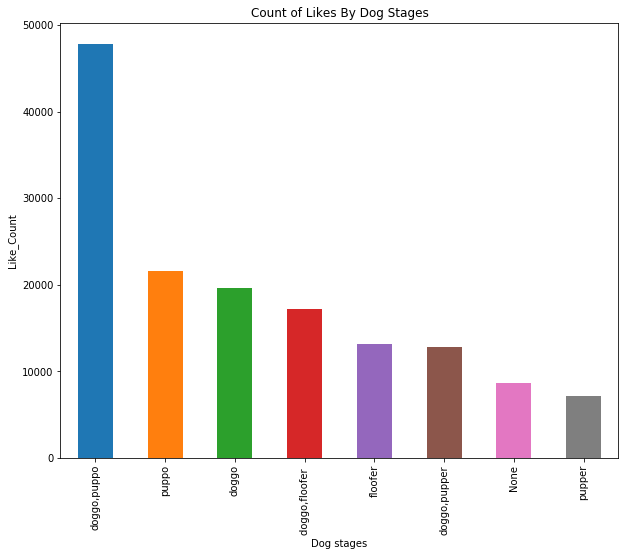

In [145]:
twitter_archive.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
plt.title('Count of Likes By Dog Stages')
plt.ylabel('Like_Count')
plt.xlabel('Dog stages')


#### Comment: The above shows that the dog stage doggo,puppo has more like than other stages with a wide margin

#### Q2: What Dog stage has the most retweet?

In [146]:
twitter_archive.groupby('dog_stages')['retweet_count'].mean().sort_values(ascending=False)

dog_stages
doggo,puppo       19196.000000
doggo              7233.885246
puppo              6473.954545
floofer            4968.714286
doggo,pupper       4153.875000
doggo,floofer      3433.000000
None               2610.228464
pupper             2343.634021
Name: retweet_count, dtype: float64

Text(0.5,0,'Dog_stages')

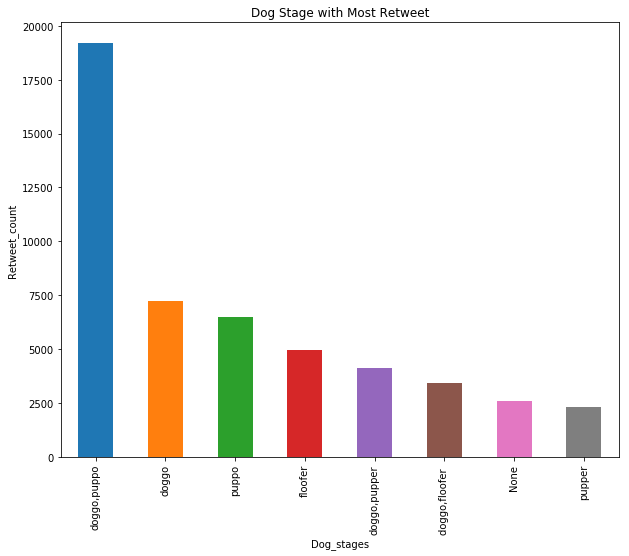

In [147]:
twitter_archive.groupby('dog_stages')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
plt.title('Dog Stage with Most Retweet')
plt.ylabel('Retweet_count')
plt.xlabel('Dog_stages')

#### Comment: Seems like the doggo,puppo dog stage still has the highest number of retweets

#### Q3: What are the sources of the tweets?

In [148]:
twitter_archive['source'].value_counts()

Twitter for iPhone    1861
Twitter Web Client      25
TweetDeck               10
Name: source, dtype: int64

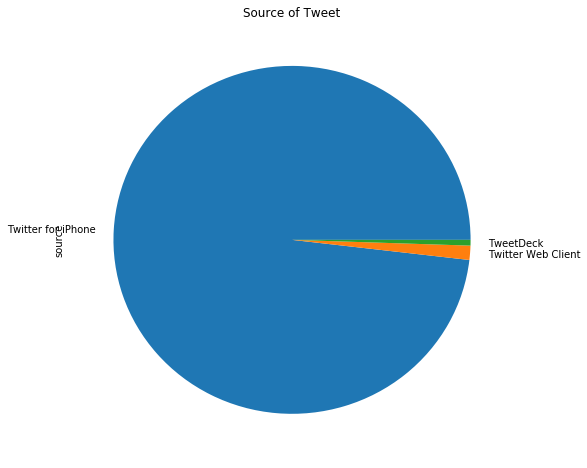

In [152]:
twitter_archive['source'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Source of Tweet');

#### Seems twitter for Iphone has the highest amounts of tweets.

#### Q4: What is the correlation between source of tweet and favorite count?

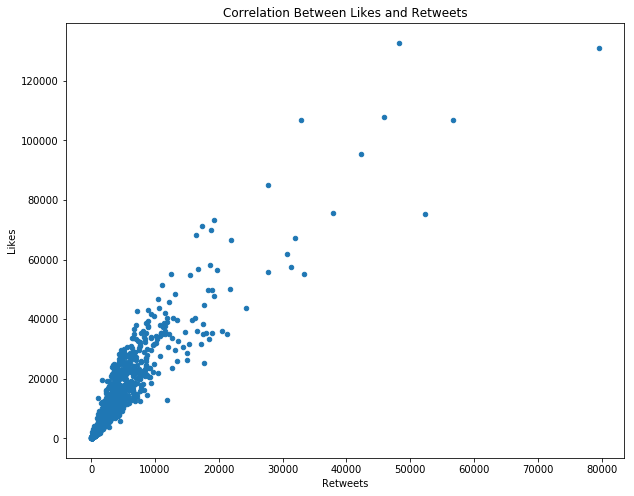

In [156]:
twitter_archive.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(10,8))
plt.title('Correlation Between Likes and Retweets')
plt.ylabel('Likes')
plt.xlabel('Retweets');

#### There seems to be a positive correlation between likes and retweets. There is a likelihood that tweets with more likes would get more retweets.